In [17]:
import pandas as pd
import numpy as np
from scipy.interpolate import griddata

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
from jinja2 import Template
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

In [2]:
r, p = 0.01, 0.0001
ns = 5

In [28]:
df = pd.read_csv('CNN_time_threshold_analysis_results.csv')
# Filter the DataFrame to only include rows where `threshold` is equal to 0.5
df = df[df['Threshold'] == 0.5]
# df = df[df['Time'] < 20]

# Replicate the DataFrame 10 times
df = pd.concat([df] * ns, ignore_index=True).sort_values(by='Time')

# Add a new column `n` with values ranging from 1 to 10
df['n'] = np.tile(np.arange(1, ns+1), len(df) // ns)

# Calculate `U` using the formula `U = (TN + FN) * n * 0.01 - FN * 0.005 * e^n`
df['U'] = (df['TN'] + df['FN']) * df['n'] * r - df['FN'] * p * np.exp(df['n'])

# Print the first 5 rows of the dataframe
# print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

In [27]:
#df.sort_values(by = 'U',ascending=False)
df.head(100)

,Unnamed: 0,Time,Threshold,TN,FP,FN,TP,n,U
0,9,1,0.5,972,7176,732,11347,1,16.841022
180,9,1,0.5,972,7176,732,11347,2,33.539121
120,9,1,0.5,972,7176,732,11347,3,49.649739
60,9,1,0.5,972,7176,732,11347,4,64.163415
240,9,1,0.5,972,7176,732,11347,5,74.336157
...,...,...,...,...,...,...,...,...,...
139,370,20,0.5,16,1819,48,5791,1,0.626952
19,370,20,0.5,16,1819,48,5791,2,1.244533
79,370,20,0.5,16,1819,48,5791,3,1.823589
259,370,20,0.5,16,1819,48,5791,4,2.297929


In [26]:
x_range = np.linspace(df["Time"].min(), df["Time"].max(), 100)
y_range = np.linspace(df["n"].min(), df["n"].max(), 100)
x_mesh, y_mesh = np.meshgrid(x_range, y_range)


z_mesh = griddata((df["Time"], df["n"]), df["U"], (x_mesh, y_mesh), method='cubic')
fig = go.Figure(data=[go.Surface(x=x_mesh, y=y_mesh, z=z_mesh)])

#fig = go.Figure(data=[go.Surface(x=df["Time"], y=df["n"], z=df["U"])])
fig.update_layout(title=dict(text='3D Surface Graph'), autosize=True,
                  width=1000, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.update_scenes(xaxis_title_text="n",
                  yaxis_title_text="Time",
                  zaxis_title_text="U")
fig.show()

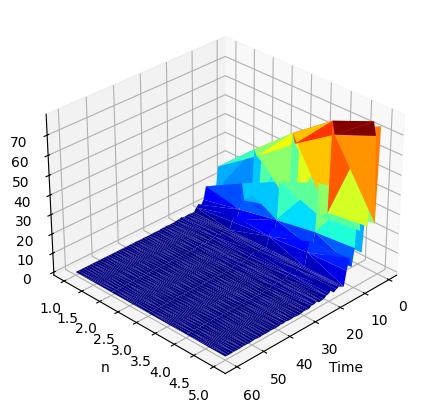

In [19]:
# Create a figure and an axes object for the 3D plot
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection="3d")

# Create the 3D surface plot
ax.plot_trisurf(df["Time"], df["n"], df["U"], cmap=cm.jet, linewidth=0.2)

# Set the axis labels
ax.set_xlabel("Time")
ax.set_ylabel("n")
ax.set_zlabel("U")

# Add interactive features for zoom and rotation
ax.view_init(elev=30, azim=45)
plt.show()